In [2]:
print("Hello world")

Hello world


# Playing around

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import pandas as pd

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
asteroid = pd.read_csv('/content/drive/MyDrive/Asteroid_Updated.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (0,10,15,16,23,24) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [6]:
asteroid.head()

name         a         e          i          om           w         q  \
0    Ceres  2.769165  0.076009  10.594067   80.305532   73.597694  2.558684   
1   Pallas  2.772466  0.230337  34.836234  173.080063  310.048857  2.133865   
2     Juno  2.669150  0.256942  12.988919  169.852760  248.138626  1.983332   
3    Vesta  2.361418  0.088721   7.141771  103.810804  150.728541  2.151909   
4  Astraea  2.574249  0.191095   5.366988  141.576605  358.687607  2.082324   

         ad     per_y  data_arc  ...     UB  IR  spec_B spec_T     G     moid  \
0  2.979647  4.608202    8822.0  ...  0.426 NaN       C      G  0.12  1.59478   
1  3.411067  4.616444   72318.0  ...  0.284 NaN       B      B  0.11  1.23324   
2  3.354967  4.360814   72684.0  ...  0.433 NaN      Sk      S  0.32  1.03454   
3  2.570926  3.628837   24288.0  ...  0.492 NaN       V      V  0.32  1.13948   
4  3.066174  4.130323   63507.0  ...  0.411 NaN       S      S   NaN  1.09589   

  class         n          per          ma  
0   MBA  0.213885  1683.145708   77.372096  
1   MBA  0.213503  1686.155999   59.699133  
2   MBA  0.226019  1592.787285   34.925016  
3   MBA  0.271609  1325.432765   95.861936  
4   MBA  0.238632  1508.600458  282.366289  

[5 rows x 31 columns]

In [7]:
list(asteroid.columns)

['name',
 'a',
 'e',
 'i',
 'om',
 'w',
 'q',
 'ad',
 'per_y',
 'data_arc',
 'condition_code',
 'n_obs_used',
 'H',
 'neo',
 'pha',
 'diameter',
 'extent',
 'albedo',
 'rot_per',
 'GM',
 'BV',
 'UB',
 'IR',
 'spec_B',
 'spec_T',
 'G',
 'moid',
 'class',
 'n',
 'per',
 'ma']

In [8]:
asteroid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839714 entries, 0 to 839713
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            21967 non-null   object 
 1   a               839712 non-null  float64
 2   e               839714 non-null  float64
 3   i               839714 non-null  float64
 4   om              839714 non-null  float64
 5   w               839714 non-null  float64
 6   q               839714 non-null  float64
 7   ad              839708 non-null  float64
 8   per_y           839713 non-null  float64
 9   data_arc        824240 non-null  float64
 10  condition_code  838847 non-null  object 
 11  n_obs_used      839714 non-null  int64  
 12  H               837025 non-null  float64
 13  neo             839708 non-null  object 
 14  pha             823272 non-null  object 
 15  diameter        137636 non-null  object 
 16  extent          18 non-null      object 
 17  albedo    

diameter has many missing values. these are not going to be helpful in any way, so let's drop them.

In [9]:
asteroid = asteroid[asteroid['diameter'].notnull()]

In [10]:
asteroid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137636 entries, 0 to 810375
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            15124 non-null   object 
 1   a               137636 non-null  float64
 2   e               137636 non-null  float64
 3   i               137636 non-null  float64
 4   om              137636 non-null  float64
 5   w               137636 non-null  float64
 6   q               137636 non-null  float64
 7   ad              137636 non-null  float64
 8   per_y           137636 non-null  float64
 9   data_arc        137498 non-null  float64
 10  condition_code  137636 non-null  object 
 11  n_obs_used      137636 non-null  int64  
 12  H               136889 non-null  float64
 13  neo             137636 non-null  object 
 14  pha             137636 non-null  object 
 15  diameter        137636 non-null  object 
 16  extent          16 non-null      object 
 17  albedo    

In [11]:
asteroid.shape

(137636, 31)

In [12]:
print(f"There are {asteroid.shape[0]} number of rows in dataset")
print(f"There are {asteroid.shape[1]} number of columns in dataset")

There are 137636 number of rows in dataset
There are 31 number of columns in dataset


In [13]:
asteroid['extent']

0         964.4 x 964.2 x 891.8
1                   582x556x500
2                           NaN
3         572.6 x 557.2 x 446.4
4                           NaN
                  ...          
797860                      NaN
798077                      NaN
798189                      NaN
799752                      NaN
810375                      NaN
Name: extent, Length: 137636, dtype: object

In [14]:
asteroid.isna().sum()

name              122512
a                      0
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     0
per_y                  0
data_arc             138
condition_code         0
n_obs_used             0
H                    747
neo                    0
pha                    0
diameter               0
extent            137620
albedo              1230
rot_per           126448
GM                137622
BV                136631
UB                136671
IR                137635
spec_B            136266
spec_T            136671
G                 137517
moid                   0
class                  0
n                      0
per                    0
ma                     0
dtype: int64

In [15]:
asteroid.shape

(137636, 31)

some features have too many data values as null. let's drop these.

In [16]:
asteroid = asteroid.drop(['G','extent','rot_per','GM','BV','UB','IR','spec_B','spec_T'], axis=1)

In [17]:
asteroid.shape

(137636, 22)

we have now removed 9 features with too many missing data

In [18]:
asteroid.isna().sum()

name              122512
a                      0
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     0
per_y                  0
data_arc             138
condition_code         0
n_obs_used             0
H                    747
neo                    0
pha                    0
diameter               0
albedo              1230
moid                   0
class                  0
n                      0
per                    0
ma                     0
dtype: int64

# More Data cleaning

1. I am dropping the name feature as it does not add any value to the model.
2. Let's then examine the features with null values and find out if they can be filled with the mean, median or anything else

In [19]:
asteroid = asteroid.drop(['name'], axis=1)

In [20]:
print("data type of data_arc is" , asteroid['data_arc'].dtype)
print("data type of H is" , asteroid['H'].dtype)
print("data type of albedo is" , asteroid['albedo'].dtype)

data type of data_arc is float64
data type of H is float64
data type of albedo is float64


since all are float values, we can consider filling these NaN values with the mean or median.

let's try using simple imputer

In [21]:
from sklearn.impute import SimpleImputer

In [22]:
impNumeric = SimpleImputer(missing_values=np.nan, strategy='mean')

In [23]:
X=asteroid[['data_arc','H','albedo']]
asteroid[['data_arc','H','albedo']]=impNumeric.fit(X).transform(X)

In [24]:
asteroid.isna().sum()

a                 0
e                 0
i                 0
om                0
w                 0
q                 0
ad                0
per_y             0
data_arc          0
condition_code    0
n_obs_used        0
H                 0
neo               0
pha               0
diameter          0
albedo            0
moid              0
class             0
n                 0
per               0
ma                0
dtype: int64

voila, no more null values!

In [25]:
asteroid['condition_code'].value_counts()

0      126194
9        5643
0        2019
9.0       863
1         808
1         565
2         302
5         241
6         152
4         143
3         135
7         129
2          94
5.0        92
7.0        78
8          49
6.0        36
4.0        33
3          32
8.0        28
Name: condition_code, dtype: int64

In [26]:
#let's convert some columns to float
asteroid['condition_code']=asteroid['condition_code'].astype(float)
asteroid['n_obs_used']=asteroid['condition_code'].astype(float)
asteroid['diameter']=asteroid['diameter'].astype(float)

In [27]:
asteroid['condition_code'].value_counts()

0.0    128213
9.0      6506
1.0      1373
2.0       396
5.0       333
7.0       207
6.0       188
4.0       176
3.0       167
8.0        77
Name: condition_code, dtype: int64

In [28]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(asteroid, test_size=0.2, random_state=42)
print(f"Rows in train set: {len(train_set)}\nRows in test set: {len(test_set)}")

Rows in train set: 110108
Rows in test set: 27528


In [29]:
train_set['condition_code'].value_counts()

0.0    102576
9.0      5233
1.0      1077
2.0       305
5.0       265
6.0       159
7.0       158
4.0       143
3.0       135
8.0        57
Name: condition_code, dtype: int64

In [30]:
test_set['condition_code'].value_counts()

0.0    25637
9.0     1273
1.0      296
2.0       91
5.0       68
7.0       49
4.0       33
3.0       32
6.0       29
8.0       20
Name: condition_code, dtype: int64

shows that condition code has been divided amongst train and test data set quite well

In [31]:
asteroid.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 137636 entries, 0 to 810375
Data columns (total 21 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   a               137636 non-null  float64
 1   e               137636 non-null  float64
 2   i               137636 non-null  float64
 3   om              137636 non-null  float64
 4   w               137636 non-null  float64
 5   q               137636 non-null  float64
 6   ad              137636 non-null  float64
 7   per_y           137636 non-null  float64
 8   data_arc        137636 non-null  float64
 9   condition_code  137636 non-null  float64
 10  n_obs_used      137636 non-null  float64
 11  H               137636 non-null  float64
 12  neo             137636 non-null  object 
 13  pha             137636 non-null  object 
 14  diameter        137636 non-null  float64
 15  albedo          137636 non-null  float64
 16  moid            137636 non-null  float64
 17  class     

In [32]:
asteroid['class'].value_counts()

MBA    126390
OMB      7510
TJN      1874
IMB       588
APO       486
MCA       355
AMO       269
ATE        95
CEN        49
TNO        13
AST         7
Name: class, dtype: int64

In [33]:
asteroid['neo'].value_counts()

N    136786
Y       850
Name: neo, dtype: int64

In [34]:
asteroid['pha'].value_counts()

N    137415
Y       221
Name: pha, dtype: int64

using onehotencoder on neo and pha as they are categorical binary features. we cannot use this on class as it has too many possible values, which will cause computational troubles.

In [35]:
categorical_cols = ['neo','pha']
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder()
array_hot_encoded = ohe.fit_transform(asteroid[categorical_cols]).toarray()
asteroid_ohe = pd.DataFrame(array_hot_encoded, index=asteroid.index, columns = ['N_neo','Y_neo', 'N_pha','Y_pha'])
asteroid_other_cols = asteroid.drop(columns=categorical_cols)
new_asteroid=pd.concat([asteroid_ohe, asteroid_other_cols], axis = 1)
#another way is in the ANN course project - it is using column transformer

In [36]:
new_asteroid.head()

N_neo  Y_neo  N_pha  Y_pha         a         e          i          om  \
0    1.0    0.0    1.0    0.0  2.769165  0.076009  10.594067   80.305532   
1    1.0    0.0    1.0    0.0  2.772466  0.230337  34.836234  173.080063   
2    1.0    0.0    1.0    0.0  2.669150  0.256942  12.988919  169.852760   
3    1.0    0.0    1.0    0.0  2.361418  0.088721   7.141771  103.810804   
4    1.0    0.0    1.0    0.0  2.574249  0.191095   5.366988  141.576605   

            w         q  ...  condition_code  n_obs_used     H  diameter  \
0   73.597694  2.558684  ...             0.0         0.0  3.34   939.400   
1  310.048857  2.133865  ...             0.0         0.0  4.13   545.000   
2  248.138626  1.983332  ...             0.0         0.0  5.33   246.596   
3  150.728541  2.151909  ...             0.0         0.0  3.20   525.400   
4  358.687607  2.082324  ...             0.0         0.0  6.85   106.699   

   albedo     moid  class         n          per          ma  
0  0.0900  1.59478    MBA  0.213885  1683.145708   77.372096  
1  0.1010  1.23324    MBA  0.213503  1686.155999   59.699133  
2  0.2140  1.03454    MBA  0.226019  1592.787285   34.925016  
3  0.4228  1.13948    MBA  0.271609  1325.432765   95.861936  
4  0.2740  1.09589    MBA  0.238632  1508.600458  282.366289  

[5 rows x 23 columns]

In [37]:
print(f"valuecount of N neo is \n{new_asteroid['N_neo'].value_counts()}")
print(f"\nvaluecount of N pha is \n{new_asteroid['N_pha'].value_counts()}")
print(f"\nvaluecount of Y neo is \n{new_asteroid['Y_neo'].value_counts()}")
print(f"\nvaluecount of Y pha is \n{new_asteroid['Y_pha'].value_counts()}")

valuecount of N neo is 
1.0    136786
0.0       850
Name: N_neo, dtype: int64

valuecount of N pha is 
1.0    137415
0.0       221
Name: N_pha, dtype: int64

valuecount of Y neo is 
0.0    136786
1.0       850
Name: Y_neo, dtype: int64

valuecount of Y pha is 
0.0    137415
1.0       221
Name: Y_pha, dtype: int64


successfully onehotencoded the two features

let's draw boxplots of the class feature

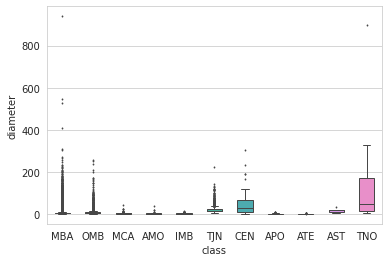

In [38]:
sns.set_style("whitegrid")
sns.boxplot(x = 'class', y = 'diameter', data = new_asteroid, linewidth=1, width=0.5, fliersize=1)

In [39]:
corr_matrix = new_asteroid.corr()

In [40]:
corr_matrix['diameter'].sort_values(ascending=False)

diameter          1.000000
data_arc          0.491580
moid              0.332423
q                 0.329703
a                 0.144736
ad                0.093430
i                 0.052609
per               0.048953
per_y             0.048953
N_neo             0.036163
N_pha             0.019599
ma                0.009659
w                 0.002966
om                0.001164
Y_pha            -0.019599
Y_neo            -0.036163
e                -0.049133
condition_code   -0.073413
n_obs_used       -0.073413
albedo           -0.107334
n                -0.201023
H                -0.568493
Name: diameter, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9d3238850>,
      dtype=object)

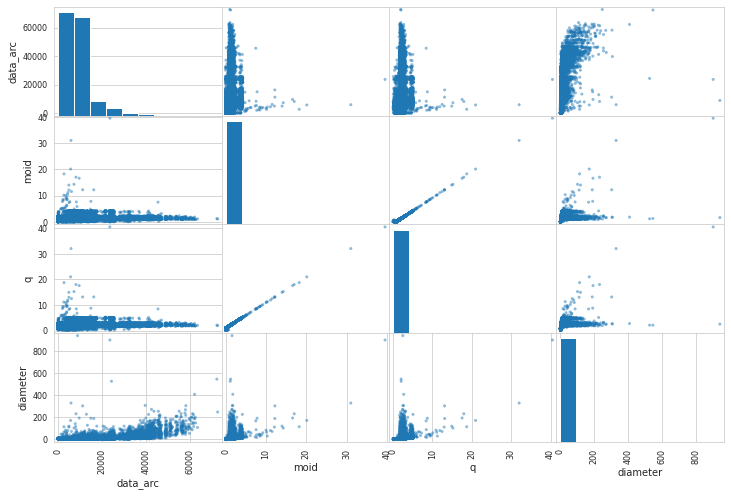

In [42]:
from pandas.plotting import scatter_matrix
attributes = ["data_arc", "moid", "q", "diameter"]
scatter_matrix(new_asteroid[attributes], figsize = (12,8))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fa9d1337350>,
      dtype=object)

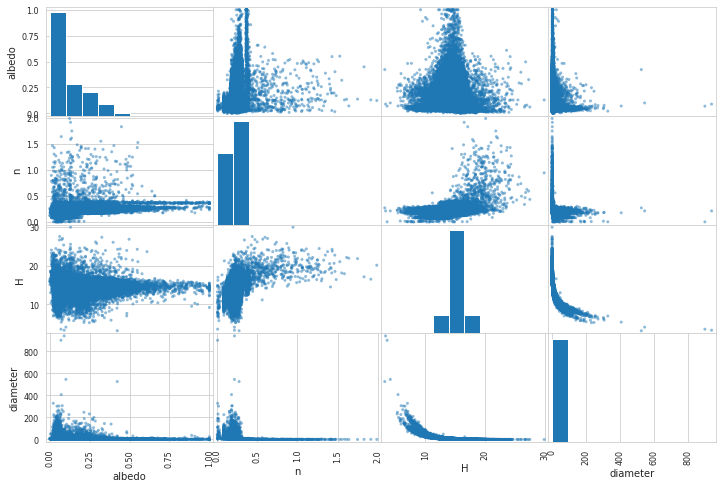

In [44]:
from pandas.plotting import scatter_matrix
attributes = ["albedo", "n", "H", "diameter"]
scatter_matrix(new_asteroid[attributes], figsize = (12,8))

***data arc, moid and 1 are the most positive parameters wrt diameter. albedo, n and H are the exact opposite.***